In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from importlib import reload
%matplotlib inline

import base
import utility

In [2]:
if True:
    data = pd.read_csv('fx_data/2009_early2018_USD_JPY_1h.csv', header=0)
    data['time'] = pd.to_datetime(data['time'], infer_datetime_format=True)

In [3]:
len(data)

54005

In [4]:
reload(base)
ta = None

r_periods = [1, 2, 6, 24, 120, 240, 480, 2400]
ta = base.TechnicalAnalysisCase(data)
ta.add_returns(r_periods)

In [5]:
ta.data.columns

Index(['time', 'open', 'high', 'low', 'close', '-1P_return', '+1P_return',
       '-2P_return', '+2P_return', '-6P_return', '+6P_return', '-24P_return',
       '+24P_return', '-120P_return', '+120P_return', '-240P_return',
       '+240P_return', '-480P_return', '+480P_return', '-2400P_return',
       '+2400P_return'],
      dtype='object')

In [6]:
ta.data.head(50)

,time,open,high,low,close,-1P_return,+1P_return,-2P_return,+2P_return,-6P_return,...,-24P_return,+24P_return,-120P_return,+120P_return,-240P_return,+240P_return,-480P_return,+480P_return,-2400P_return,+2400P_return
0,2009-01-01 20:12:00,90.76,90.84,90.69,90.77,NaN,0.110169,NaN,0.198303,NaN,...,NaN,1.344056,NaN,0.407624,NaN,-0.209320,NaN,-1.090669,NaN,5.794866
1,2009-01-01 21:30:00,90.77,90.90,90.73,90.87,0.110169,0.088038,NaN,0.275118,NaN,...,NaN,1.287554,NaN,0.187080,NaN,-0.154066,NaN,-1.111478,NaN,5.359305
2,2009-01-01 22:49:00,90.87,90.97,90.85,90.95,0.088038,0.186916,0.198303,0.197911,NaN,...,NaN,1.132490,NaN,-0.230896,NaN,-0.483782,NaN,-1.330401,NaN,5.508521
3,2009-01-01 23:59:00,90.96,91.21,90.94,91.12,0.186916,0.010975,0.275118,0.164618,NaN,...,NaN,0.921861,NaN,-0.131694,NaN,-1.009658,NaN,-1.602283,NaN,4.949517
4,2009-01-02 01:27:00,91.09,91.21,91.05,91.13,0.010975,0.153627,0.197911,0.175573,NaN,...,NaN,1.733787,NaN,-0.307253,NaN,-0.844947,NaN,-1.580160,NaN,5.025787
5,2009-01-02 02:41:00,91.13,91.32,91.12,91.27,0.153627,0.021913,0.164618,-0.054783,NaN,...,NaN,2.005040,NaN,-0.438260,NaN,-0.734086,NaN,-1.840692,NaN,4.590775
6,2009-01-02 03:45:00,91.27,91.34,91.12,91.29,0.021913,-0.076679,0.175573,-0.142403,0.572877,...,NaN,1.960784,NaN,-0.120495,NaN,-0.733925,NaN,-2.147004,NaN,4.633585
7,2009-01-02 04:49:00,91.28,91.33,91.13,91.22,-0.076679,-0.065775,-0.054783,-0.010963,0.385166,...,NaN,2.247314,NaN,-0.570050,NaN,-0.526200,NaN,-2.543302,NaN,4.691954
8,2009-01-02 06:03:00,91.23,91.28,91.14,91.16,-0.065775,0.054849,-0.142403,0.230364,0.230896,...,NaN,2.468188,NaN,-0.899517,NaN,-0.142606,NaN,-2.292672,NaN,4.716981
9,2009-01-02 07:08:00,91.16,91.27,91.15,91.21,0.054849,0.175419,-0.010963,0.010964,0.098771,...,NaN,2.313343,NaN,-1.041552,NaN,0.000000,NaN,-2.390089,NaN,4.330665


In [7]:
plus_labels = [col for col in ta.data.columns if 'return' in col and '+' in col]
minus_labels = [col for col in ta.data.columns if 'return' in col and '-' in col]
print(plus_labels)
print(minus_labels)

['+1P_return', '+2P_return', '+6P_return', '+24P_return', '+120P_return', '+240P_return', '+480P_return', '+2400P_return']
['-1P_return', '-2P_return', '-6P_return', '-24P_return', '-120P_return', '-240P_return', '-480P_return', '-2400P_return']


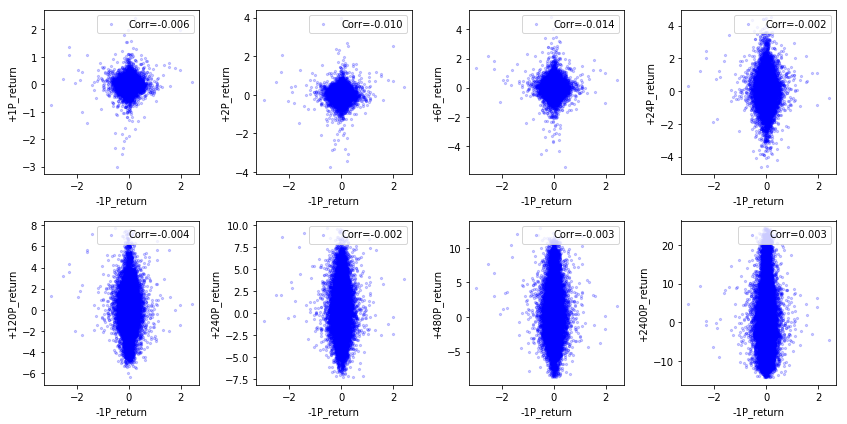

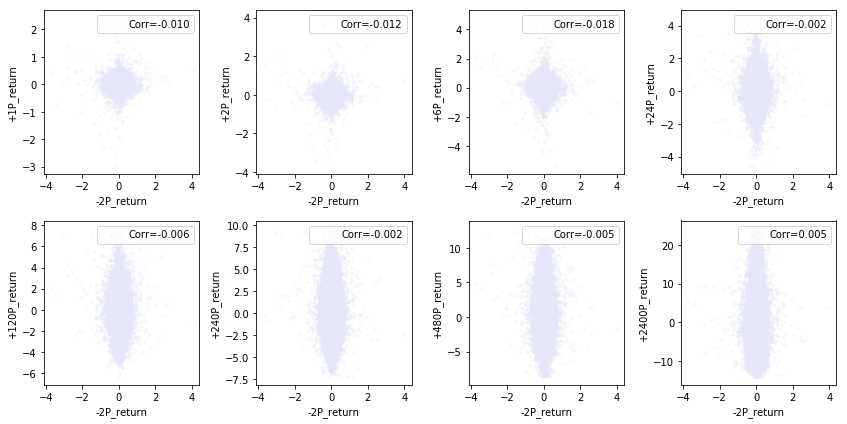

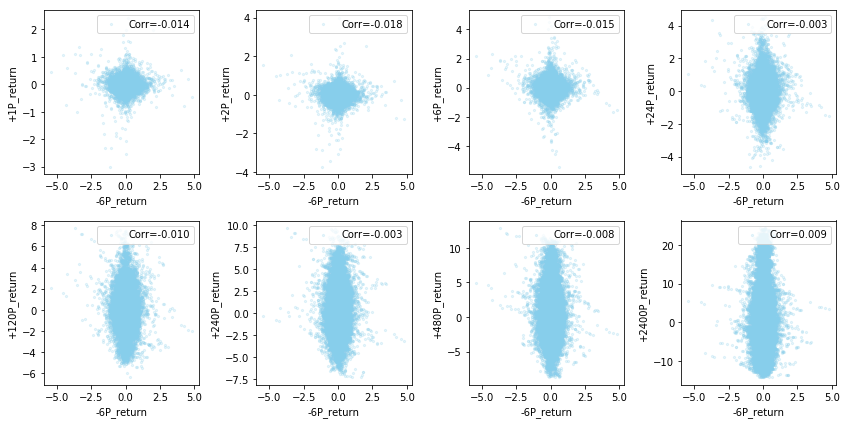

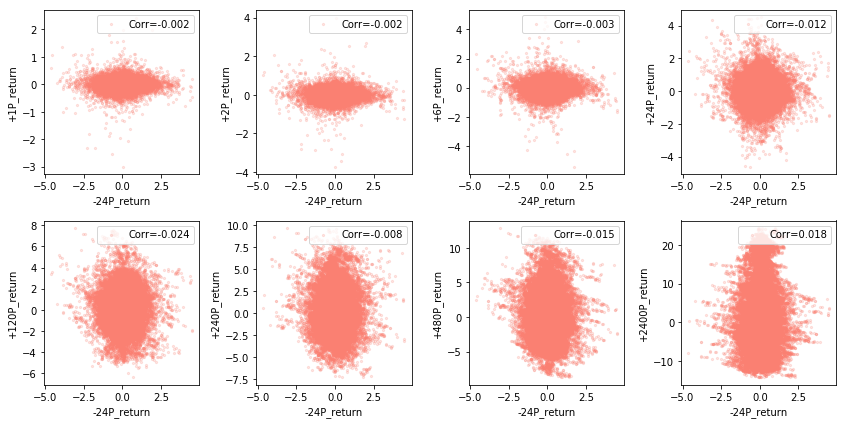

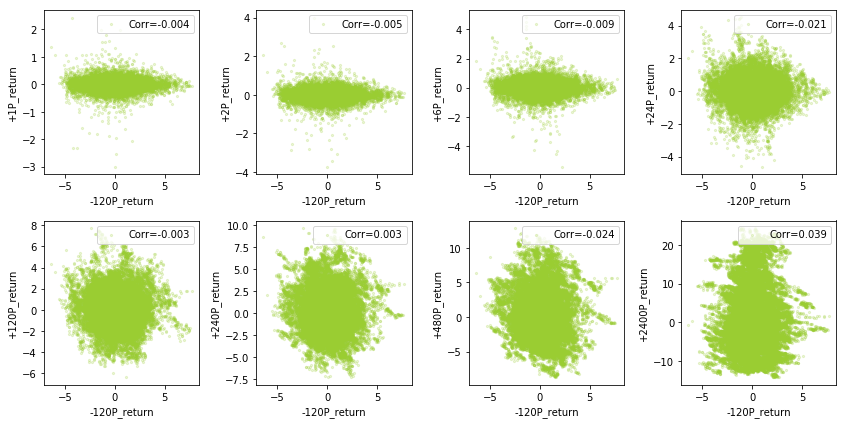

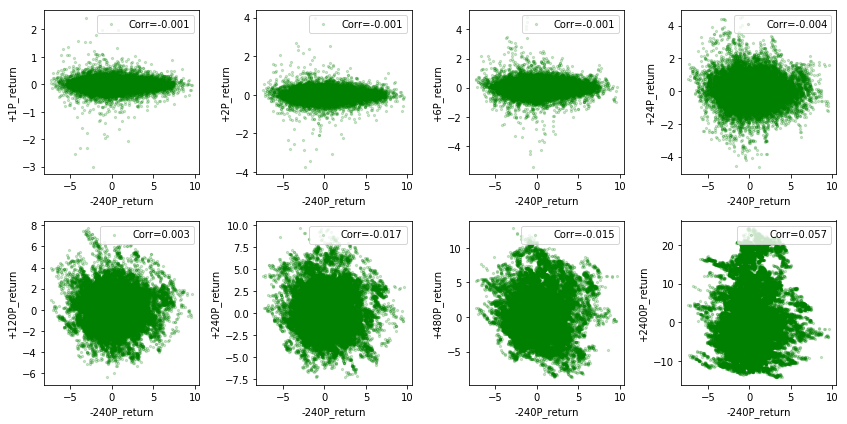

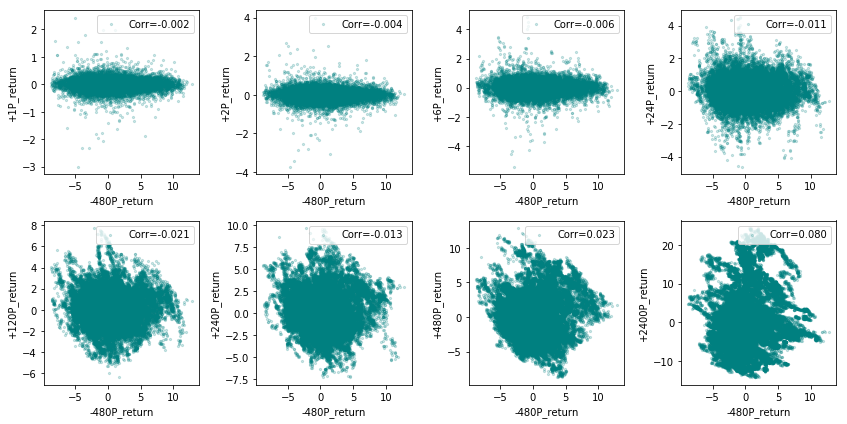

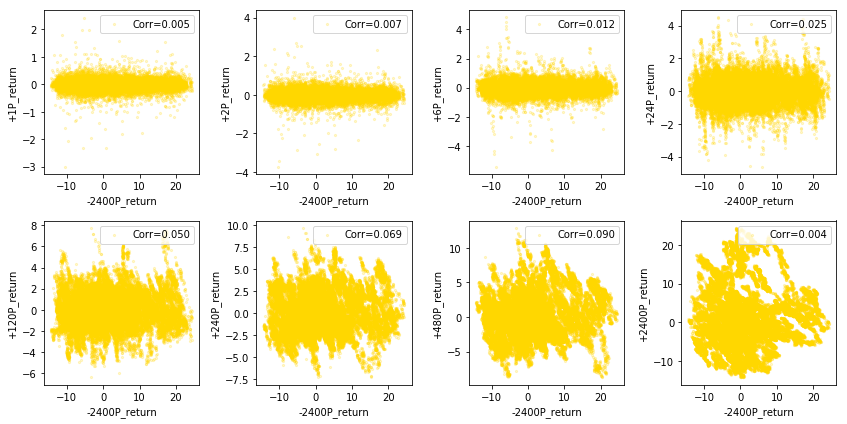

In [8]:
colors = ['blue', 'lavender', 'skyblue', 'salmon', 'yellowgreen', 'green', 'teal', 'gold']
for i, minus_r in enumerate(minus_labels):
    fig = plt.figure(figsize=(12, 6))
    for j, plus_r in enumerate(plus_labels):
        ax = fig.add_subplot(2, 4, j+1)
        pearson = ta.data[minus_r].corr(ta.data[plus_r])
        ax.scatter(ta.data[minus_r], ta.data[plus_r], color=colors[i], s=5, alpha=0.2, label=('Corr=%.3f' % pearson))
        ax.set_xlabel(minus_r)
        ax.set_ylabel(plus_r)
        ax.legend(loc='upper right')
    plt.tight_layout()

CPU times: user 20min 53s, sys: 1.6 s, total: 20min 54s
Wall time: 20min 54s


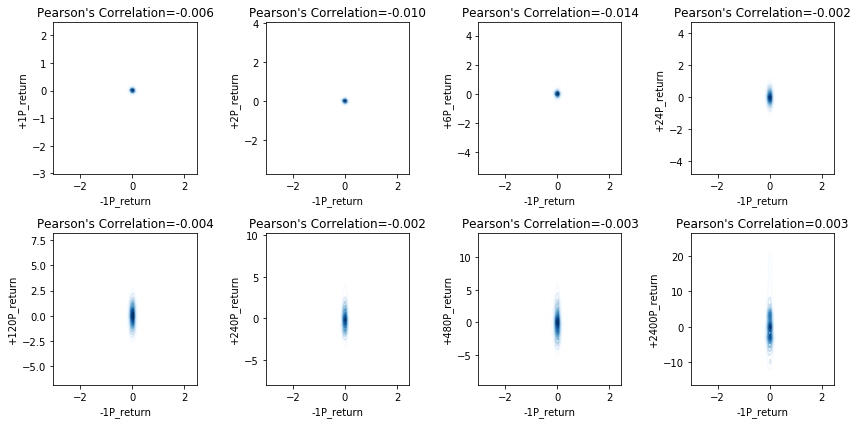

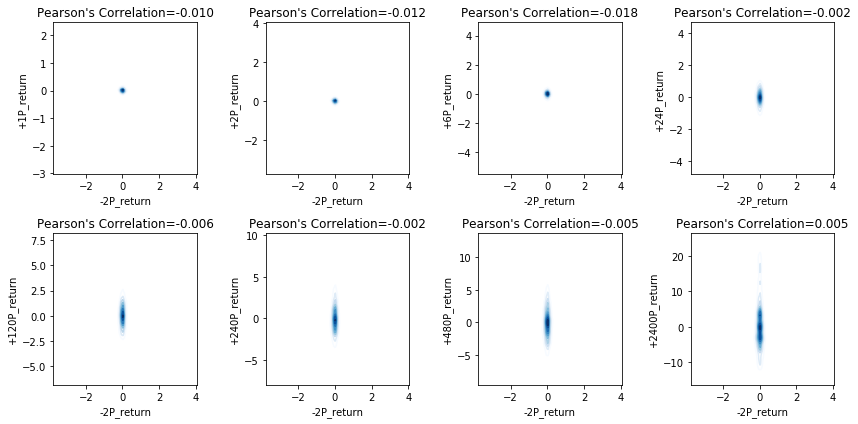

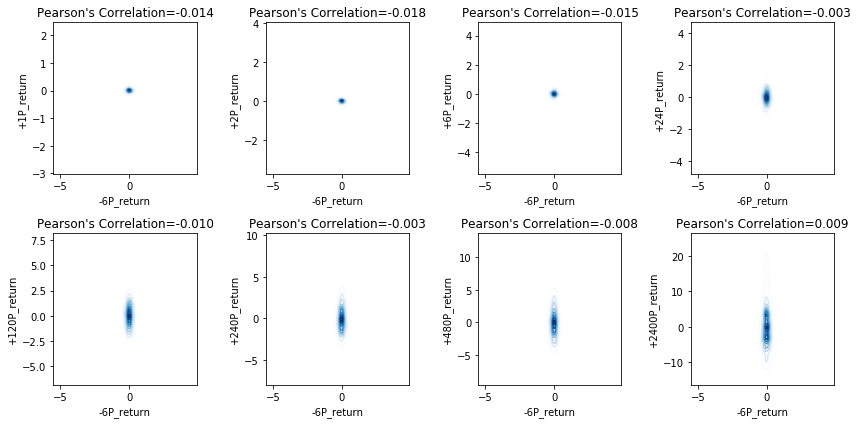

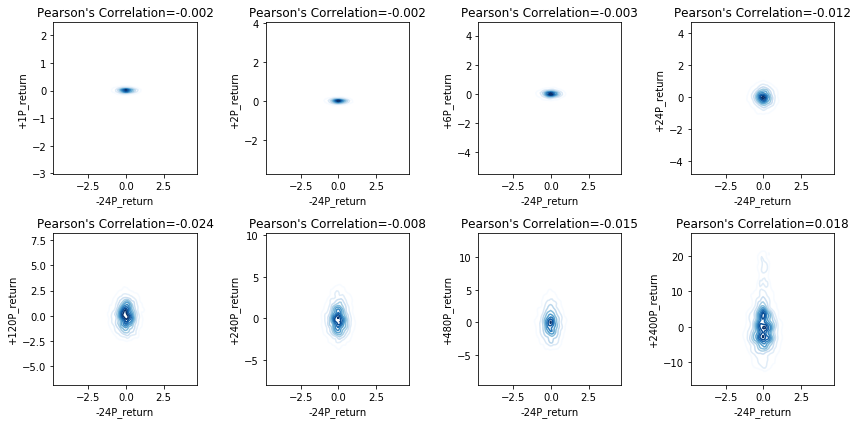

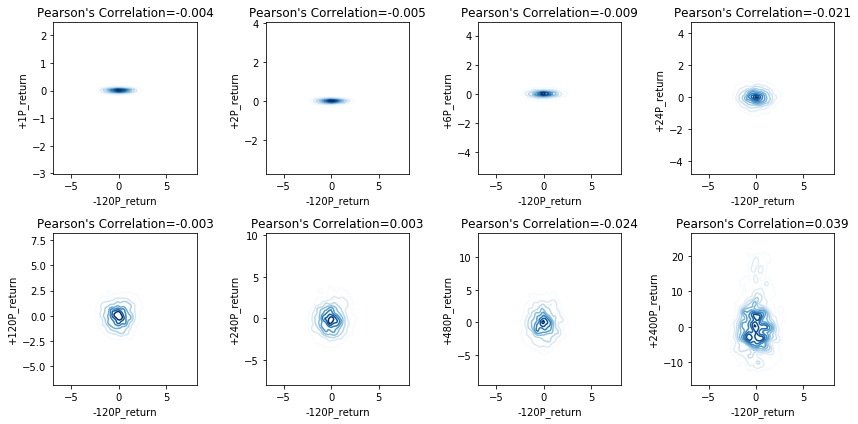

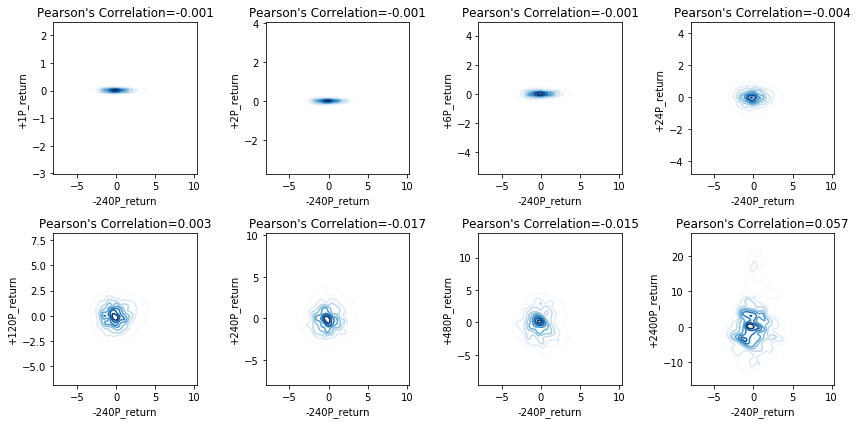

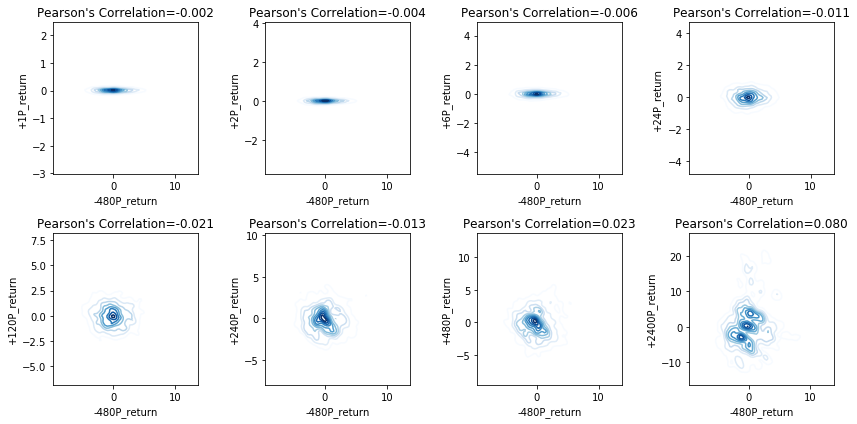

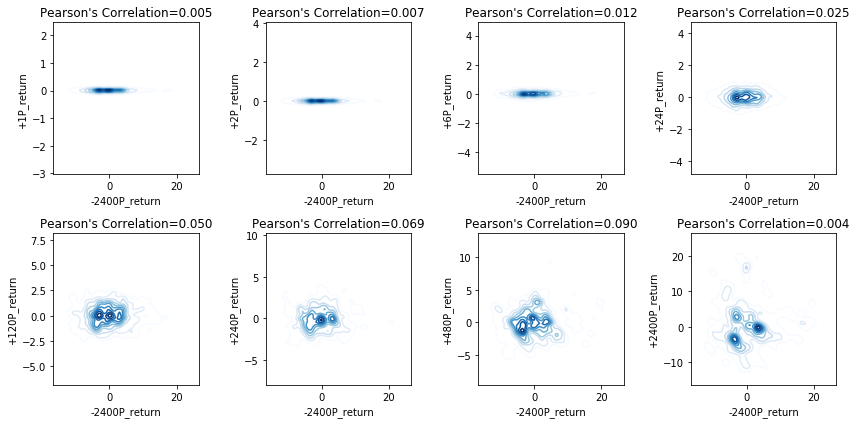

In [14]:
%%time
for i, minus_r in enumerate(minus_labels):
    fig = plt.figure(figsize=(12, 6))
    for j, plus_r in enumerate(plus_labels):
        ax = fig.add_subplot(2, 4, j+1)
        df = pd.concat([ta.data[minus_r], ta.data[plus_r]], axis=1).dropna()
        sns.kdeplot(df.iloc[:, 0], df.iloc[:, 1], cmap="Blues", ax=ax)
        ax.set_xlabel(minus_r)
        ax.set_ylabel(plus_r)
        pearson = ta.data[minus_r].corr(ta.data[plus_r])
        ax.set_title('Pearson\'s Correlation=%.3f' % pearson)
    plt.tight_layout()